# Kneip 2008

* Kneip, A., & Ramsay, J. O. (2008). Combining Registration and Fitting for Functional Models. Journal of the American Statistical Association, 103(483), 1155–1165. https://doi.org/10.1198/016214508000000517
* Srivastava, A., Wu, W., Kurtek, S., Klassen, E., & Marron, J. S. (2011). Registration of Functional Data Using Fisher-Rao Metric. Retrieved from http://arxiv.org/abs/1103.3817

In [13]:
# loading modules
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from time import time


import seaborn as sns

## Dev specific functions

We generated 21 curves over the interval [−3, 3] of the form (eq 17):

$y_{i}^{*}(t)=z_{i 1} \exp \left[(t-1.5)^{2} / 2\right]+z_{i 2} \exp \left[(t+1.5)^{2} / 2\right]$

and $z_{i1}$ and $z_{i2}$ from $N(1,.25^2)$.

In [2]:
def fun_y_star(t, z1, z2):
    """
    Eq 17 in Kneip & Ramsay 2008. The sign at the exponentials are wrong. 
    I double-checked that in Srivastava et al 2011
    """
    
    return z1*np.exp((-(t-1.5)**2)/2) + z2*np.exp((-(t+1.5)**2)/2)

The associated warping functions $h_i$ were (eq 18):

$h_{i}(t)=\left\{\begin{array}{ll}6 \frac{\exp \left[a_{i}(t+3) / 6\right]-1}{\exp \left[a_{i}\right]-1}-3, & a_{i} \neq 0 \\ t & \text { otherwise }\end{array}\right.$

The coefficients $a_i$ were equally spaced between −1 and 1.

In [3]:
def fun_h(t, a_i):
    """
    warping function
    Eq 18 in Kneip and Ramsay 2008
    """
    if a_i==0:
        return t
    else:
        return 6*(np.exp(a_i*(t+3)/6) -1)/(np.exp(a_i) -1) -3
    
    return


## Generating data

In [4]:
np.random.seed(42)

N_cvs = 21
t0, tf, N_t = -3, 3, 100

z12 = np.random.normal(1, .25**2, (N_cvs,2)) 

t_range = np.linspace(-3, 3, N_t)
a_range = np.linspace(-1, 1, N_cvs)

,h_0,h_1,h_2,h_3,h_4,h_5,h_6,h_7,h_8,h_9,...,h_12,h_13,h_14,h_15,h_16,h_17,h_18,h_19,h_20,t
0,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,...,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000
1,-2.904605,-2.908501,-2.912308,-2.916024,-2.919648,-2.923179,-2.926615,-2.929955,-2.933199,-2.936345,...,-2.945197,-2.947952,-2.950610,-2.953170,-2.955634,-2.958003,-2.960278,-2.962460,-2.964550,-2.939394
2,-2.810169,-2.817830,-2.825322,-2.832640,-2.839782,-2.846745,-2.853526,-2.860123,-2.866533,-2.872755,...,-2.890284,-2.895746,-2.901019,-2.906103,-2.910998,-2.915708,-2.920233,-2.924576,-2.928740,-2.878788
3,-2.716682,-2.727980,-2.739035,-2.749844,-2.760399,-2.770697,-2.780732,-2.790501,-2.800001,-2.809229,...,-2.835259,-2.843382,-2.851228,-2.858797,-2.866092,-2.873113,-2.879864,-2.886347,-2.892566,-2.818182
4,-2.624135,-2.638942,-2.653444,-2.667631,-2.681495,-2.695031,-2.708231,-2.721090,-2.733604,-2.745767,...,-2.780123,-2.790859,-2.801235,-2.811252,-2.820912,-2.830215,-2.839167,-2.847769,-2.856026,-2.757576


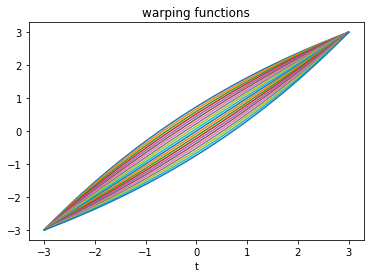

In [5]:
df_hi_t = pd.DataFrame(np.array([fun_h(t_range, a_i) for a_i in a_range]).T, 
                     columns=["h_%i"%i for i in range(N_cvs)])
df_hi_t["t"] = t_range

display(df_hi_t.head())

df_hi_t.plot(x="t", legend=False, title="warping functions");

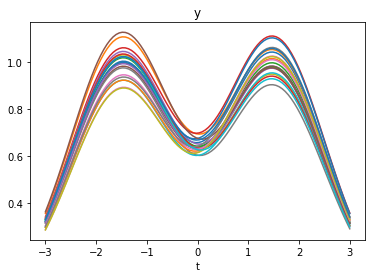

In [6]:
i = 0
y_star = np.array([fun_y_star(t_range, z12[i,0], z12[i,1]) for i in range(N_cvs)]).T

df_y_star = pd.DataFrame(y_star)
df_y_star["t"] = t_range

df_y_star.plot(x="t", legend=False, title="y");

$x_i (t) = y_i [h_i (t)]$

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,t
0,0.321888,0.355598,0.319941,0.340268,0.335700,0.315241,0.285871,0.313279,0.331066,0.296034,...,0.326942,0.332313,0.318772,0.362275,0.303231,0.299923,0.284930,0.328684,0.328172,-3.000000
1,0.369736,0.406222,0.363532,0.384602,0.377492,0.352712,0.318289,0.347142,0.365152,0.325042,...,0.354428,0.358817,0.342874,0.388219,0.323784,0.319149,0.302190,0.347483,0.345882,-2.939394
2,0.420326,0.459688,0.409519,0.431322,0.421484,0.392113,0.352342,0.382675,0.400883,0.355421,...,0.383134,0.386474,0.368003,0.415248,0.345183,0.339153,0.320137,0.367020,0.364278,-2.878788
3,0.473058,0.515419,0.457455,0.480018,0.467331,0.433168,0.387818,0.419682,0.438084,0.387041,...,0.412980,0.415219,0.394113,0.443322,0.367402,0.359916,0.338760,0.387286,0.383356,-2.818182
4,0.527228,0.572741,0.506815,0.530211,0.514625,0.475551,0.424465,0.457928,0.476548,0.419747,...,0.443871,0.444974,0.421142,0.472385,0.390405,0.381413,0.358041,0.408267,0.403107,-2.757576


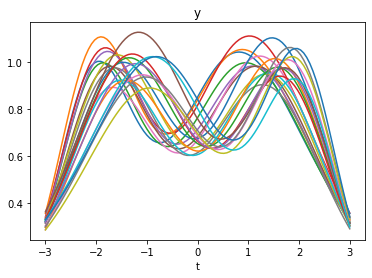

In [9]:
i = 0
x = np.array([fun_y_star(df_hi_t.iloc[:,i].values, z12[i,0], z12[i,1]) for i in range(N_cvs)]).T

df_x = pd.DataFrame(x)
df_x["t"] = t_range

display(df_x.head())

df_x.plot(x="t", legend=False, title="y");

## Registration 

In [8]:
import fdasrsf as fs

In [10]:
t_vec = np.copy(df_x["t"].values)
f     = np.copy(df_x.iloc[:,:-1])

print(f.shape, t_vec.shape)

(100, 21) (100,)


In [11]:
obj = fs.fdawarp(f, t_vec)

In [15]:
# This function aligns a collection of functions using the elastic square-root slope (srsf) framework.

tic = time()

obj.srsf_align(parallel=True, smoothdata=False)

elapsed = time()-tic
print("- Elapsed time:")
print("%.4f (s)"%(elapsed))
print("%.4f (min)"%(elapsed/60))
print("%.4f (h)"%(elapsed/(60*60)))

Initializing...
Compute Karcher Mean of 21 function in SRSF space...
updating step: r=1
updating step: r=2
- Elapsed time:
0.3464 (s)
0.0058 (min)
0.0001 (h)


In [ ]:
# extracting warp functions vectors

gamma = np.copy(obj.gam)

M = gamma.shape[0]
print(M)

In [26]:
t0, tf = np.copy(t_vec[0]), np.copy(t_vec[-1])
t_vec2 = np.array([(tf - t0) * gamma[:, k]+ t0 for k in range(f.shape[1])]).T


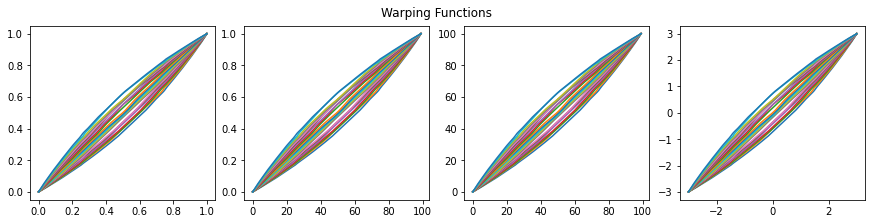

In [27]:
fig, axes = plt.subplots(1,4,figsize=(12,3), constrained_layout=True)

axes[0].plot(np.arange(0, M) / float(M - 1), gamma);
axes[1].plot(gamma);
axes[2].plot(M*gamma);
axes[3].plot(t_vec, t_vec2);

plt.suptitle("Warping Functions");

In [17]:
f_w = np.copy(obj.fn) # Registered (warped) data
#np.save("f-2021-11-10", f)
#np.save("f_w-2021-11-10", f_w)

In [18]:
(obj.time == t_vec).all()

True

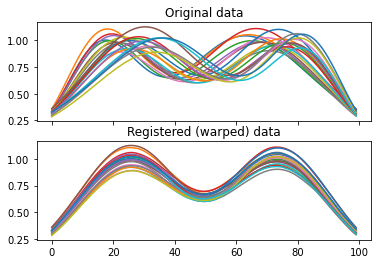

In [22]:
# plotting


fig, axes = plt.subplots(2,1, sharex=True)
axes = axes.ravel()
i=0
axes[i].set_title("Original data")
axes[i].plot(f);


i+=1
axes[i].set_title("Registered (warped) data")
axes[i].plot(f_w);


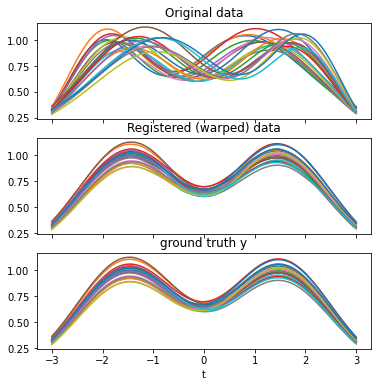

In [25]:
# plotting

fig, axes = plt.subplots(3,1, figsize=(6,6),sharex=True)
axes = axes.ravel()
i=0
axes[i].set_title("Original data")
axes[i].plot(t_vec,f);


i+=1
axes[i].set_title("Registered (warped) data")
axes[i].plot(t_vec,f_w)
axes[i].set_xlabel("time index");

i+=1
df_y_star.plot(x="t", legend=False, title="ground truth y", ax=axes[i]);

## analysing one curve

In [32]:
y1 = np.copy(df_y_star.iloc[:,0].values) # ground truth
f1 = np.copy(f[:,0]) # "measured" data

gamma1 = np.copy(gamma[:,0]) # warping function
t_warped = t_vec2[:,0]       # warping fuction with the same range as the original time

# inverse warping function
from scipy.interpolate import CubicSpline

gamma_inv = CubicSpline(t_warped, t_vec)
x = np.linspace(np.min(t_warped),np.max(t_warped),len(t_warped))

t_warped_inv = gamma_inv(x)

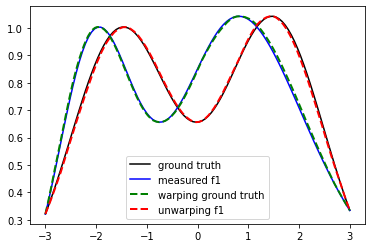

In [84]:
plt.plot(t_vec, y1, "k", label="ground truth")
plt.plot(t_vec, f1, "b", label="measured f1")

plt.plot(t_warped,y1, "g--", lw=2, label="warping ground truth")
plt.plot(t_warped_inv,f1, "--r", lw=2, label="unwarping f1")

plt.legend()

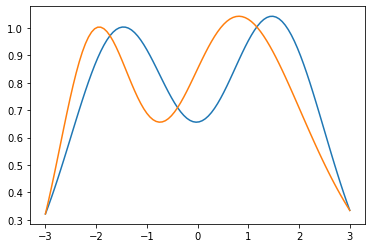

In [35]:
plt.plot(t_vec,y1)
plt.plot(t_vec,f1)


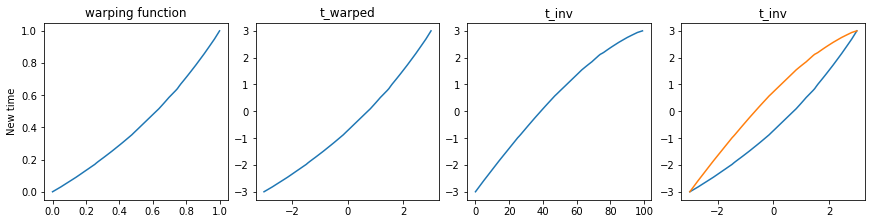

In [44]:
fig, axes = plt.subplots(1,4,figsize=(12,3), constrained_layout=True)

axes[0].set_title("warping function")
axes[0].set_ylabel("New time")
axes[0].plot(np.arange(0, M) / float(M - 1), gamma1);

axes[1].set_title("t_warped")
axes[1].plot(t_vec, t_warped);


axes[2].set_title("t_inv")
axes[2].plot(t_inv);

axes[3].set_title("t_inv")
axes[3].plot(t_vec, t_warped);
axes[3].plot(t_vec, t_inv);


In [ ]:
np.interp(x=, xp = t_vec, fp = t_warped)

In [77]:
from scipy.interpolate import CubicSpline

gamma_inv = CubicSpline(t_warped, t_vec)
t_w0, t_wf = np.min(t_warped), np.max(t_warped)
x_temp = np.linspace(t_w0, t_wf,len(t_warped))

t_warped_inv = gamma_inv(x_temp)

In [68]:
from scipy.optimize import minimize
from scipy.interpolate import CubicSpline


function_cs = CubicSpline(t_vec, t_warped)

def diff(x,a):
    yt = function_cs(x)
    return (yt - a )**2

def fun_num_inverse(x):
    """numerically inverse of a function"""
    y = np.zeros(x.shape)
    
    for idx, x_value in enumerate(x):
        res = minimize(diff, 1.0, args=(x_value), method='Nelder-Mead', tol=1e-6)
        y[idx] = res.x[0]
        
    return y

In [ ]:
x = np.linspace(np.min(t_warped),np.max(t_warped),len(t_warped))
print(x.shape)
#y = np.zeros(x.shape)

y = fun_num_inverse(x)

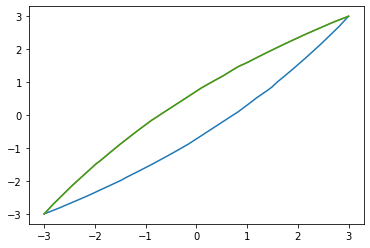

In [76]:
plt.plot(t_vec, t_warped)
plt.plot(x,y)
plt.plot(x, t_warped_inv)

(100,)


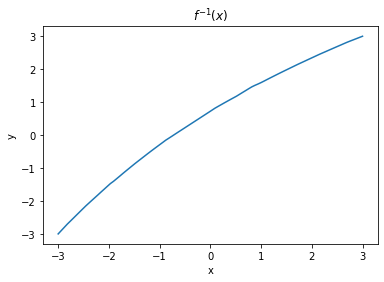

In [70]:


plt.plot(x,y)

plt.title(r'$f^{-1}(x)$')
plt.xlabel('x')
plt.ylabel('y');

In [63]:
from scipy.optimize import minimize

# ref: https://moonbooks.org/Articles/How-to-numerically-compute-the-inverse-function-in-python-using-scipy-/

def function(x):
    y = 1.0 * x**5.0
    return y

def diff(x,a):
    yt = function(x)
    return (yt - a )**2

def fun_num_inverse(x):
    """numerically inverse of a function"""
    y = np.zeros(x.shape)
    
    for idx, x_value in enumerate(x):
        res = minimize(diff, 1.0, args=(x_value), method='Nelder-Mead', tol=1e-6)
        y[idx] = res.x[0]
        
    return y

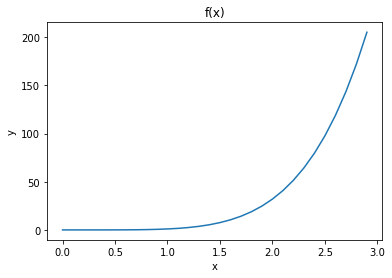

In [64]:
x = np.arange(0.0, 3.0, 0.1)

y = function(x)

plt.plot(x,y)

plt.title('f(x)')
plt.xlabel('x')
plt.ylabel('y');


Text(0, 0.5, 'y')

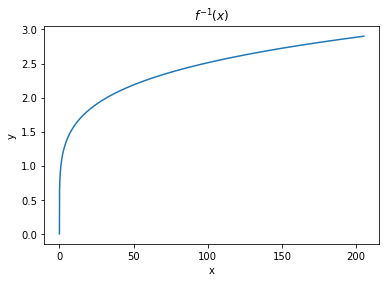

In [65]:

x = np.arange(np.min(y),np.max(y),0.1)

#y = np.zeros(x.shape)

y = fun_num_inverse(x)

plt.plot(x,y)

plt.title(r'$f^{-1}(x)$')
plt.xlabel('x')
plt.ylabel('y');